Data is downloaded from 
https://archive.usgs.gov/archive/sites/speclab.cr.usgs.gov/spectral.lib06/ds231/datatable.html

W1R1Bb ASCII data for each endmember.

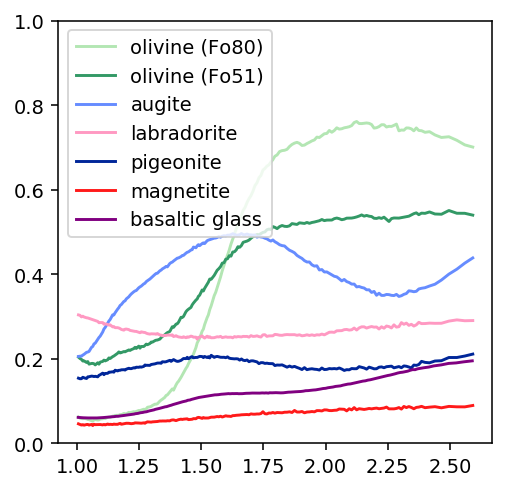

In [1]:
from utils.plotting import *
plot_endmembers()
# Endmembers used in CRISM analysis (USGS + basaltic glass from RELAB)

## Handling CRISM data

Download all the data on the PDS site, open the .hdr TRDR image in CAT ENVI, convert PDS to CAT, save, and then open here.  

Use library called Spectral Python (SPy) http://www.spectralpython.net/user_guide.html to access the data and manipulate it in Numpy. 

In [1]:
# Select data source & pull down data

import numpy as np
from spectral import *
import spectral.io.envi as envi
from utils.constants import *
from utils.access_data import *
%matplotlib inline



In [3]:
d=get_CRISM_data()

here
/Users/marina/Documents/PhD/research/mars_research/code/spectral_analysis/utils/../../../data/20200420T120530535238/cartorder/ato0002ec79_01_if169l_trr3_CAT.img.hdr
/Users/marina/Documents/PhD/research/mars_research/code/spectral_analysis/utils/../../../data/20200420T120530535238/cartorder/ato0002ec79_01_if169l_trr3_CAT.img
	Data Source:   '/Users/marina/Documents/PhD/research/mars_research/code/spectral_analysis/utils/../../../data/20200420T120530535238/cartorder/ato0002ec79_01_if169l_trr3_CAT.img'
	# Rows:            178
	# Samples:         640
	# Bands:           438
	Interleave:        BIL
	Quantization:  32 bits
	Data format:   float32


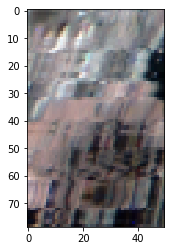

In [5]:

bands = (4, 80, 100)
view = imshow(data=d, bands=bands)

In [2]:
record_reduced_spectra()

For endmember : olivine (Fo80)
(480, 3)
not adding 2.624

 All reduced spectra should have same length 
CRISM : 184
USGS 184
BASALT 184


/Users/marina/Documents/PhD/research/mars_research/code/spectral_analysis/utils/access_data.py:102: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  CRISM_data = pd.read_csv(crism_dir + "../wavelengths/z.txt", sep="  ", header=0)


In [6]:
with open(MODULE_DIR + "/utils/FILE_CONSTANTS/RW_BASALT.pickle", 'rb') as handle:
    basaltrw = pickle.load(handle)
with open(MODULE_DIR + "/utils/FILE_CONSTANTS/RW_USGS.pickle", 'rb') as handle:
    RW_USGS = pickle.load(handle)
with open(MODULE_DIR + "/utils/FILE_CONSTANTS/RW_CRISM.pickle", 'rb') as handle:
    RW_CRISM = pickle.load(handle)

In [8]:
print(len(basaltrw))
print(len(RW_USGS))
print(len(RW_CRISM))

184
184
184


In [7]:
# wavelengths that are treated equally across USGS, RELAB, and CRISM
for index, val in enumerate(basaltrw):
    basalt = val
    usgs = RW_USGS[index]
    crism = RW_CRISM[index]
    print(str(basalt) + "  vs.  " + str(usgs ) +  "  vs.  " + str(crism))

1.005  vs.  1.006  vs.  1.00135
1.01  vs.  1.012  vs.  1.0079
1.015  vs.  1.018  vs.  1.01445
1.02  vs.  1.0235  vs.  1.021
1.025  vs.  1.0285  vs.  1.02755
1.035  vs.  1.0385  vs.  1.0341
1.04  vs.  1.0435  vs.  1.04065
1.045  vs.  1.0485  vs.  1.0472
1.055  vs.  1.0585  vs.  1.05375
1.06  vs.  1.0635  vs.  1.0603
1.065  vs.  1.0685  vs.  1.06685
1.07  vs.  1.0735  vs.  1.07341
1.08  vs.  1.0835  vs.  1.07996
1.085  vs.  1.0885  vs.  1.08651
1.09  vs.  1.0935  vs.  1.09307
1.1  vs.  1.1035  vs.  1.09962
1.105  vs.  1.1085  vs.  1.10617
1.11  vs.  1.1135  vs.  1.11273
1.12  vs.  1.1235  vs.  1.1192799999999998
1.125  vs.  1.1285  vs.  1.12584
1.13  vs.  1.1335  vs.  1.13239
1.14  vs.  1.1435  vs.  1.13895
1.145  vs.  1.1485  vs.  1.14551
1.15  vs.  1.1535  vs.  1.15206
1.16  vs.  1.1635  vs.  1.15862
1.165  vs.  1.1685  vs.  1.1651799999999999
1.17  vs.  1.1735  vs.  1.17173
1.175  vs.  1.1785  vs.  1.17829
1.185  vs.  1.1885  vs.  1.18485
1.19  vs.  1.1935  vs.  1.19141
1.195  vs.  1.